In [1]:
# Import the libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Get the data

In [2]:
# Get the data
data = pd.read_csv('moore.csv', header=None).values

# Reshape the data to become a 2D array
X = data[:, 0].reshape(-1, 1)
y= data[:, 1]

# Have a look
print(X[0:5])
print(y[0:5])

[[1971]
 [1972]
 [1973]
 [1973]
 [1974]]
[2300 3500 2500 2500 4100]


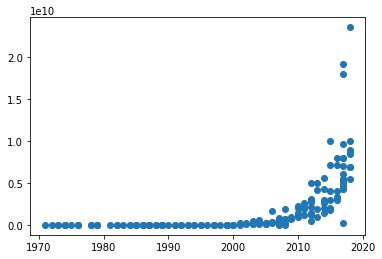

In [3]:
# Plot the data
plt.scatter(X, y);

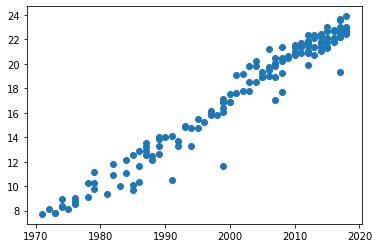

In [4]:
# Perform log transformation
log_y = np.log(y)

# Plot the data
plt.scatter(X, log_y)

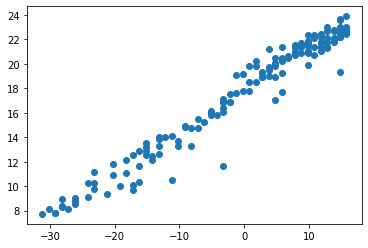

In [5]:
# We need to center X around 0
X_centered =  X - np.mean(X)

# Plot the data
plt.scatter(X_centered, log_y)

In [6]:
# Create the train-test split
X_train, X_test, y_train, y_test = train_test_split(X_centered, log_y, test_size=0.25, random_state=100)

### Create and train the model

In [7]:
# Define the layers
input_layer = tf.keras.layers.Input(shape=(1,))
dense_layer = tf.keras.layers.Dense(1) # The default is activation=None

In [8]:
# Define the model
model = tf.keras.models.Sequential([input_layer, dense_layer])

In [9]:
# Define how the model will be trained/fit
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9), # define the optimizer 
              loss='mse') # define the cost function

In [10]:
# Create a learning rate scheduler
# The model works better if the learning rate decreases as the itteration increases
def schedule(epoch, lr):
    if epoch >= 50:
        return 0.0001
    else:
        return 0.001
    
# Use the scheduler
scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

In [11]:
# Train the model
result = model.fit(x=X_train, y=y_train, 
                   validation_data=(X_test, y_test),
                   epochs=200, callbacks=[scheduler])

Train on 121 samples, validate on 41 samples
Epoch 1/200
121/121 [==============================] - 1s 4ms/sample - loss: 589.7966 - val_loss: 825.9587
Epoch 2/200
121/121 [==============================] - 0s 146us/sample - loss: 550.1064 - val_loss: 282.9771
Epoch 3/200
121/121 [==============================] - 0s 157us/sample - loss: 460.6473 - val_loss: 257.5353
Epoch 4/200
121/121 [==============================] - 0s 157us/sample - loss: 332.6181 - val_loss: 340.2324
Epoch 5/200
121/121 [==============================] - 0s 141us/sample - loss: 264.5157 - val_loss: 260.3066
Epoch 6/200
121/121 [==============================] - 0s 132us/sample - loss: 224.5149 - val_loss: 236.5684
Epoch 7/200
121/121 [==============================] - 0s 140us/sample - loss: 190.6750 - val_loss: 137.9915
Epoch 8/200
121/121 [==============================] - 0s 141us/sample - loss: 138.7017 - val_loss: 123.4831
Epoch 9/200
121/121 [==============================] - 0s 148us/sample - loss: 116.43

121/121 [==============================] - 0s 132us/sample - loss: 0.8414 - val_loss: 0.9714
Epoch 78/200
121/121 [==============================] - 0s 134us/sample - loss: 0.8414 - val_loss: 0.9713
Epoch 79/200
121/121 [==============================] - 0s 140us/sample - loss: 0.8414 - val_loss: 0.9713
Epoch 80/200
121/121 [==============================] - 0s 149us/sample - loss: 0.8415 - val_loss: 0.9711
Epoch 81/200
121/121 [==============================] - 0s 149us/sample - loss: 0.8412 - val_loss: 0.9720
Epoch 82/200
121/121 [==============================] - 0s 149us/sample - loss: 0.8420 - val_loss: 0.9712
Epoch 83/200
121/121 [==============================] - 0s 132us/sample - loss: 0.8412 - val_loss: 0.9720
Epoch 84/200
121/121 [==============================] - 0s 140us/sample - loss: 0.8412 - val_loss: 0.9720
Epoch 85/200
121/121 [==============================] - 0s 135us/sample - loss: 0.8408 - val_loss: 0.9713
Epoch 86/200
121/121 [==============================] - 0s 

121/121 [==============================] - 0s 139us/sample - loss: 0.8383 - val_loss: 0.9717
Epoch 154/200
121/121 [==============================] - 0s 138us/sample - loss: 0.8395 - val_loss: 0.9699
Epoch 155/200
121/121 [==============================] - 0s 140us/sample - loss: 0.8382 - val_loss: 0.9702
Epoch 156/200
121/121 [==============================] - 0s 140us/sample - loss: 0.8386 - val_loss: 0.9700
Epoch 157/200
121/121 [==============================] - 0s 157us/sample - loss: 0.8391 - val_loss: 0.9697
Epoch 158/200
121/121 [==============================] - 0s 132us/sample - loss: 0.8381 - val_loss: 0.9704
Epoch 159/200
121/121 [==============================] - 0s 140us/sample - loss: 0.8404 - val_loss: 0.9722
Epoch 160/200
121/121 [==============================] - 0s 124us/sample - loss: 0.8383 - val_loss: 0.9710
Epoch 161/200
121/121 [==============================] - 0s 132us/sample - loss: 0.8394 - val_loss: 0.9699
Epoch 162/200
121/121 [============================

In [12]:
# Print the results
print("Train loss:", model.evaluate(x=X_train, y=y_train, verbose=0))
print("Test loss:", model.evaluate(x=X_test, y=y_test, verbose=0))

Train loss: 0.8368173975589847
Test loss: 0.9700737799086222


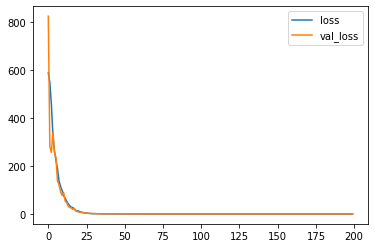

In [13]:
# Plot the cost function at each itteration
# Note: model.fit() returns an object that contains the history of the training process
plt.plot(result.history['loss'], label='loss');
plt.plot(result.history['val_loss'], label='val_loss');
plt.legend();

In [14]:
# Get the trained parameters of the model
print(model.layers[0].get_weights())

[array([[0.34110093]], dtype=float32), array([17.749422], dtype=float32)]


w1 is 0.34284508 and b (intercept) is 17.750555

In [15]:
# Get weights
print(model.layers[0].get_weights()[0])

[[0.34110093]]


In [16]:
# Get intercept
print(model.layers[0].get_weights()[1])

[17.749422]
